<a href="https://colab.research.google.com/github/cnyakundi/time-series/blob/master/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Basics
According to <a href='https://en.wikipedia.org/wiki/Time_series'>wikipedia</a>, a time series is "a series of data points indexed in time order." The goal of time series analysis is to predict future values based on past behavior. 

This differs from other analyses that compare $x$ to $y$, since $x$ is not really a variable. For example, if I measure the boiling point of water with 1%, 3%, 5% and 7% salt solutions, I should be able to predict the boiling point at 4%. But with time series, we can't go back and "plug in" a new value of $x$, since we can never go back in time. For this reason, a time series with one $y$ variable is called <em>univariate</em>. 

By the end of this course you will understand the following code, and be able to create your own time series plots.

<div class="alert alert-info"><h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>by Rob J Hyndman and George Athanasopoulos</font><br>
<strong>
<a href='https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4.htm'>NIST/SEMATECH e-Handbook of Statistical Methods</a></strong>&nbsp;&nbsp;<font color=black>Introduction to Time Series Analysis</font></div>

### Loading our libraries *italicised text*

In [13]:
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt


In [14]:
#Loading our dataset 

df = pd.read_csv('co2_mm_mlo.csv', encoding='utf8')

df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [20]:
#Checking for datatypes

df.dtypes

year              int64
month             int64
decimal_date    float64
average         float64
interpolated    float64
dtype: object

In [15]:
title =' Monthly Mean CO2 Levels (ppm) over Mauna Loa Hawaii'


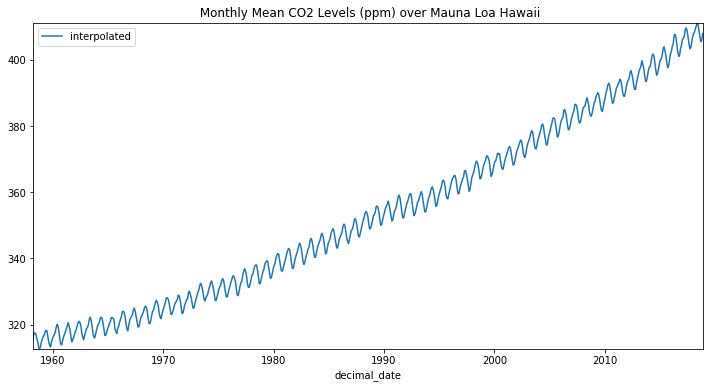

In [18]:
df.plot('decimal_date','interpolated',figsize=(12,6),title=title).autoscale(axis='both',tight=True)


The above plot clearly illustrates some of the fundamentals of time series analysis:
* **trend** - over the past 60 years there is a clear, non-linear upward trend in the levels of CO<sub>2</sub> in the atmosphere at Mauna Loa, Hawaii
* **seasonality** - within any given year there are cyclical patterns of rising and falling CO<sub>2</sub> levels
* **noise** - we also see random, non-systemic fluctuations in the data

## What are "endog" and "exog"?
The data seen in a time series is described as either <em>endogenous</em>, that is, caused by factors within the system, or <em>exogenous</em>, caused by factors outside the system. We'll see that many statsmodels tools use <tt>endog</tt> to represent the incoming time series data in place of the constant <tt>y</tt>.<br>
For more information, visit http://www.statsmodels.org/stable/endog_exog.html

For most of this course we will be loading datasets into `pandas`, and we'll seldom worry about the format that dates take. This is because the `pandas` native data type (brought over from NumPy) is more compact and runs far more efficiently than Python's built-in datetime object.<br>Still, it can't hurt to understand `datetime` objects.

In [22]:
#Python has the built-in datetime objects availabe through the datetime module. 


# Here we are importing the entire datetime module 
import datetime 

In [24]:
tm=datetime.time(hour=5, minute=25, second=1)

tm

datetime.time(5, 25, 1)

In [26]:
#We can also pass it as a positional argument 

tm=datetime.time(5,25,1)

tm

datetime.time(5, 25, 1)

In [27]:
print(tm)

05:25:01


In [28]:
#checking the type of time 

type(tm)

datetime.time

## datetime datetime objects 

In [33]:
d=datetime.datetime(2019,1,2,5,25,1)

print(d)

2019-01-02 05:25:01


In [36]:
#Printing Now's date

x = datetime.datetime.now()

print(x)

2021-09-22 14:25:23.585120


### Selective import
For efficiency, we can import just those object classes we plan to use.

In [41]:
from datetime import datetime, date, time

In [38]:
d = datetime(2019, 3, 1, 15, 10)    # this is easier to type
print(d)

2019-03-01 15:10:00


## Deep dive into the `date`, `time` and `datetime` components 

In [65]:
# We can access specific elements of the date and time within each object.

today_date=datetime.today()


today_date

datetime.datetime(2021, 9, 22, 14, 38, 32, 902545)

In [66]:
print(today_date.year)
print(today_date.month)
print(today_date.date())

2021
9
2021-09-22


## Playing with `Date` object 

In [64]:

# We start by getting today's date 

today=date.today()
print(today.year)

print(today.month)

print(today.day)

print(today.min)

print(today.max)


2021
9
22
0001-01-01
9999-12-31
2021-09-22 14:38:12.641681


### Useful Methods 

In [67]:
d = datetime(1969,7,20,20,17)

In [72]:
# d.weekday returns day of the week as an integer 

d.weekday()

6

In [70]:
# d.isoweekday() returns day of the week as an integer where monday is 1 and Sunday 7 

d.isoweekday()

7

In [75]:
## `d.replace()`** returns a modified copy of the original, permitting substitutions for any date/time attribute

print(d.replace(year=1975,month=3))
print(print(d))



1975-03-20 20:17:00
1969-07-20 20:17:00
None


###  Time tuples
`datetime.timetuple()` returns a named tuple of values. Note that `date.timetuple()` returns 0 values for time elements.

In [78]:
r = date(2004,10,27)
s = datetime(2004,10,27,20,25,55)

In [79]:
r.timetuple()

time.struct_time(tm_year=2004, tm_mon=10, tm_mday=27, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=2, tm_yday=301, tm_isdst=-1)

In [80]:
s.timetuple()

time.struct_time(tm_year=2004, tm_mon=10, tm_mday=27, tm_hour=20, tm_min=25, tm_sec=55, tm_wday=2, tm_yday=301, tm_isdst=-1)

<table style="display: inline-block">
<caption style="text-align: center">**TIME TUPLE VALUES**</caption>
<tr><th>NAME</th><th>EQUIVALENT</th><th>EXAMPLES</th></tr>
<tr><td>tm_year</td><td>d.year</td><td>2004</td></tr>
<tr><td>tm_mon</td><td>d.month</td><td>10</td></tr>
<tr><td>tm_mday</td><td>d.day</td><td>27</td></tr>
<tr><td>tm_hour</td><td>d.hour</td><td>20</td></tr>
<tr><td>tm_min</td><td>d.minute</td><td>25</td></tr>
<tr><td>tm_sec</td><td>d.second</td><td>55</td></tr>
<tr><td>tm_wday</td><td>d.weekday()</td><td>2</td></tr>
<tr><td>tm_yday</td><td>see below</td><td>301</td></tr></table>

**tm_yday** is the number of days within the current year starting with 1 for January 1st, as given by the formula<br>
&emsp;&emsp; <tt>yday = d.toordinal() - date(d.year, 1, 1).toordinal() + 1</tt><br><br>
**tm_isdst** relates to timezone settings 

# Introduction to Time Series with Pandas

## Python Datetime Review

In [81]:
from datetime import datetime

In [87]:
my_year=2021 

my_month =9

my_day=22

my_hour=17

my_minute= 50

my_second=12

In [84]:
# Sep 22nd 2021
my_date = datetime(my_year,my_month,my_day)

In [85]:
my_date

datetime.datetime(2021, 9, 22, 0, 0)

In [90]:
# Sep 22nd 2021 and time displayed 

my_date_time = datetime(my_year,my_month,my_day,my_hour,my_minute,my_second)

my_date_time


datetime.datetime(2021, 9, 22, 17, 50, 12)

In [93]:
# You can grab any part of the datetime object you want

print(my_date_time.day)
print(my_date_time.hour)

22
17


## NumPy Datetime Arrays

NumPy handles dates more efficiently than Python's datetime format.<br>
The NumPy data type is called <em>datetime64</em> to distinguish it from Python's datetime.

In [94]:
import numpy as np

### CREATE AN ARRAY FROM THREE DATES

In [96]:
np.array(['2016-02-15', '2017-12-23', '2000-10-01'], dtype='datetime64')

array(['2016-02-15', '2017-12-23', '2000-10-01'], dtype='datetime64[D]')

<div class="alert alert-info"><strong>NOTE:</strong> We see the dtype listed as <tt>'datetime64[D]'</tt>. This tells us that NumPy applied a day-level date precision.<br>
    If we want we can pass in a different measurement, such as <TT>[h]</TT> for hour or <TT>[Y]</TT> for year.</div>

In [97]:
np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[Y]')

array(['2016', '2017', '2018'], dtype='datetime64[Y]')

## NumPy Date Ranges
Just as <tt>np.arange(start,stop,step)</tt> can be used to produce an array of evenly-spaced integers, we can pass a <tt>dtype</tt> argument to obtain an array of dates. Remember that the stop date is <em>exclusive</em>.

In [100]:
# AN ARRAY OF DATES FROM 6/1/18 TO 6/22/18 SPACED ONE WEEK APART
np.arange('2018-06-01', '2018-06-23', step=7, dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [102]:
# By omitting the step value we can obtain every value based on the precision.

# AN ARRAY OF DATES FOR EVERY YEAR FROM 1968 TO 1975
np.arange('1968', '1976', dtype='datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'],
      dtype='datetime64[Y]')

##  Pandas Datetime Index

We'll usually deal with time series as a datetime index when working with pandas dataframes. Fortunately pandas has a lot of functions and methods to work with time series!<br>
For more on the pandas DatetimeIndex visit https://pandas.pydata.org/pandas-docs/stable/timeseries.html

In [103]:
#Loading pandas library 

import pandas as pd

In [105]:
idx=pd.date_range('7/8/2020', periods=7, freq='D')

idx

DatetimeIndex(['2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11',
               '2020-07-12', '2020-07-13', '2020-07-14'],
              dtype='datetime64[ns]', freq='D')

<div class="alert alert-info"><strong>DatetimeIndex Frequencies:</strong> When we used <tt>pd.date_range()</tt> above, we had to pass in a frequency parameter <tt>'D'</tt>.

# Another way is to convert incoming text with the <tt><strong>pd.to_datetime()</strong></tt> method:

In [108]:
idx=pd.to_datetime(['Jan 01, 1990'])
idx

DatetimeIndex(['1990-01-01'], dtype='datetime64[ns]', freq=None)

Another way is to convert incoming text with the <tt><strong>pd.to_datetime()</strong></tt> method:

In [109]:
idx = pd.to_datetime(['Jan 01, 2018','1/2/18','03-Jan-2018',None])
idx

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', 'NaT'], dtype='datetime64[ns]', freq=None)

In [110]:
# Create a NumPy datetime array
some_dates = np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')
some_dates

array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')

In [111]:
# Convert to an index
idx = pd.DatetimeIndex(some_dates)
idx

DatetimeIndex(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[ns]', freq=None)

Notice that even though the dates came into pandas with a day-level precision, pandas assigns a nanosecond-level precision with the expectation

## Pandas Datetime Analysis

In [115]:
#Create some random data 

data=np.random.randn(3,2)

cols=["A", "B"]

print(data)

[[ 0.28367256  1.19364844]
 [-0.21557708  1.98958325]
 [-0.94954862  0.4993452 ]]


In [124]:
# Create a DataFrame with our random data, our date index, and our columns

df=pd.DataFrame(data=data, index=idx, columns=cols)
df

,A,B
2016-03-15,0.283673,1.193648
2017-05-24,-0.215577,1.989583
2018-08-09,-0.949549,0.499345


In [119]:
df.index

DatetimeIndex(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[ns]', freq=None)

In [125]:
# We can get the Latest Date Value

df.index.max()

Timestamp('2018-08-09 00:00:00')

In [126]:
# We can get the Latest Date Index Location

df.index.argmax()

2

In [127]:
# We can get the Earliest Date Value

df.index.min()

Timestamp('2016-03-15 00:00:00')

<div class="alert alert-info"><strong>NOTE:</strong> Normally we would find index locations by running <tt>.idxmin()</tt> or <tt>.idxmax()</tt> on <tt>df['column']</tt> since <tt>.argmin()</tt> and <tt>.argmax()</tt> have been deprecated. However, we still use <tt>.argmin()</tt> and <tt>.argmax()</tt> on the index itself.</div>

# Time Resampling 

Let's learn how to sample time series data! 

In [129]:
#Import the required libraries 

import pandas as pd
%matplotlib inline


In [140]:
# We will use a sample starbucks data 

#Loading our data 

df=pd.read_csv("starbucks.csv", index_col='Date', parse_dates=True)

In [139]:
#Previewing our dataset 

df.head(3)

,Date,Close,Volume
0,2015-01-02,38.0061,6906098
1,2015-01-05,37.2781,11623796
2,2015-01-06,36.9748,7664340


# Note: the above code is a faster way of doing the following:

In [137]:
# Alternatively we can go the long way this way 

#df=pd.read_csv("starbucks.csv")
#df['Date']=pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)

In [138]:
# We can confirm the datatypes and index

In [142]:
# Our Index 
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

## Time for some calculations 

In [143]:
# Yearly Means

df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


Resampling rule 'A' takes all of the data points in a given year, applies the aggregation function (in this case we calculate the mean), and reports the result as the last day of that year.

### Custom Resampling Functions

We're not limited to pandas built-in summary functions (min/max/mean etc.). We can define our own function:

In [147]:
def first_day(entry):
  """
  Returns the first instance of the period, regardless of sampling rate.

  """
  if len(entry) !=0:
     # handles the case of missing data
    return entry[0]

In [146]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


# Plotting our data 

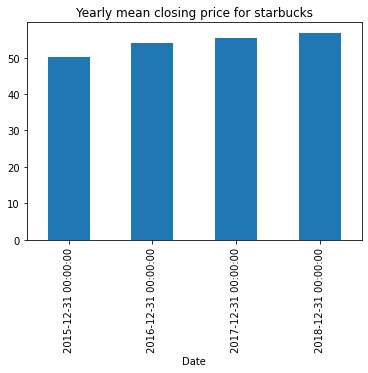

In [150]:
df['Close'].resample('A').mean().plot.bar(title='Yearly mean closing price for starbucks')

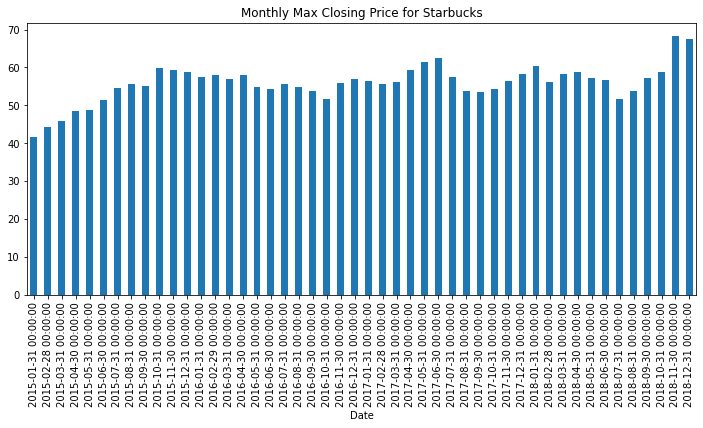

In [151]:
title='Monthly Max Closing Price for Starbucks'

df['Close'].resample('M').max().plot.bar(figsize=(12,5), title=title, color='#1f77b4')

# Time Shifting 

Sometimes you may need to shift all your data up or down along the time series index. In fact, a lot of pandas built-in methods do this under the hood. This isn't something we'll do often in the course, but it's definitely good to know about this anyways!

In [152]:
import pandas as pd

In [153]:
# We load the starbucks data again 

df=pd.read_csv("starbucks.csv", index_col='Date', parse_dates=True)

In [154]:
# Preview our data 

df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [155]:
# last rows

df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


## .shift() forward

This method shifts the entire date index a given number of rows, without regard for time periods (months & years).<br>It returns a modified copy of the original DataFrame.

In [156]:
# Shift 1 period ahead 

df.shift(1).head()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


# NOTE: You will lose that last piece of data that no longer has an index!
df.shift(1).tail()

## .shift() backwards

In [157]:
df.shift(-1).head()

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0


In [158]:
df.shift(-1).tail()

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


## Shifting based on Time Series Frequency Code

We can choose to shift <em>index values</em> up or down without realigning the data by passing in a <strong>freq</strong> argument.<br>
This method shifts dates to the next period based on a frequency code. Common codes are 'M' for month-end and 'A' for year-end. <br>Refer to the <em>Time Series Offset Aliases</em> table

In [167]:
# Shift everything forward one month
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html
df.shift(periods=1, freq='Y').head()


,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2015-12-31,37.2781,11623796
2015-12-31,36.9748,7664340
2015-12-31,37.8848,9732554
2015-12-31,38.4961,13170548


# Rolling and Expanding

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a <em>simple moving average</em>. 

In [168]:
#Loading our libraries 

import pandas as pd
%matplotlib inline

In [170]:
# Import the data:
df = pd.read_csv('starbucks.csv', index_col='Date', parse_dates=True)

In [171]:
#Preview the head 

df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


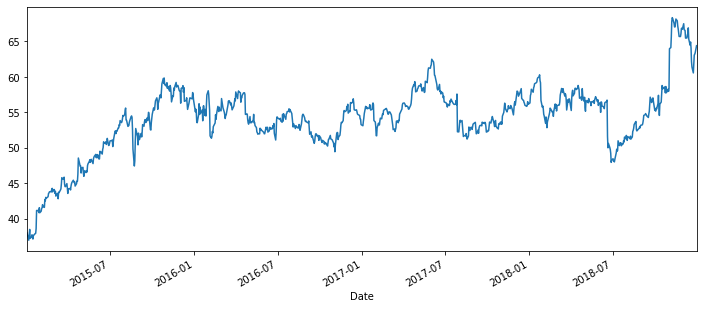

In [172]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x', tight=True)

Now let's add in a rolling mean! This rolling method provides row entries, where every entry is then representative of the window.

In [173]:
df.rolling(window=7).mean().head(15)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


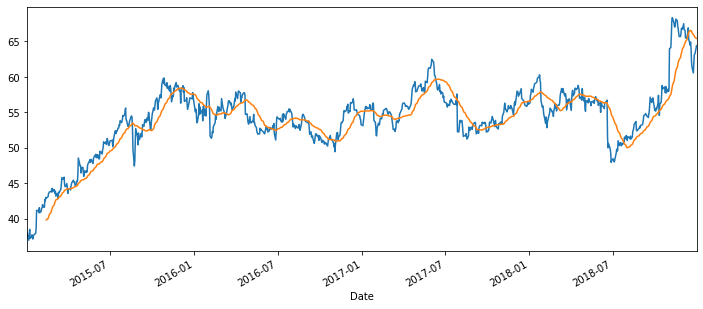

In [189]:

df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df.rolling(window=30).mean()['Close'].plot()


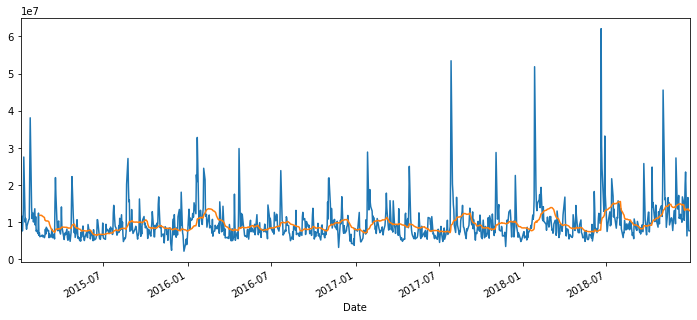

In [190]:
df['Volume'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)


df.rolling(window=30).mean()['Volume'].plot()

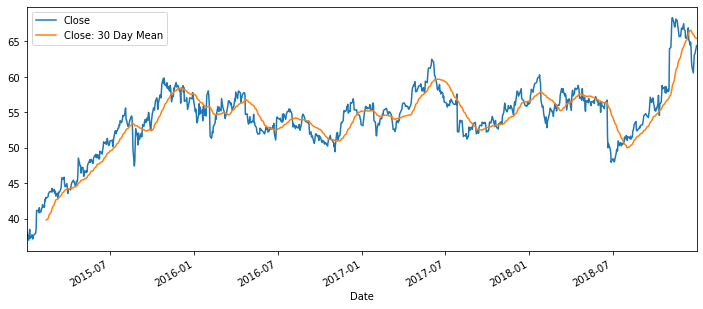

In [195]:
df['Close: 30 Day Mean'] =df['Close'].rolling(window=30).mean()

df[['Close', 'Close: 30 Day Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

## Expanding

Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

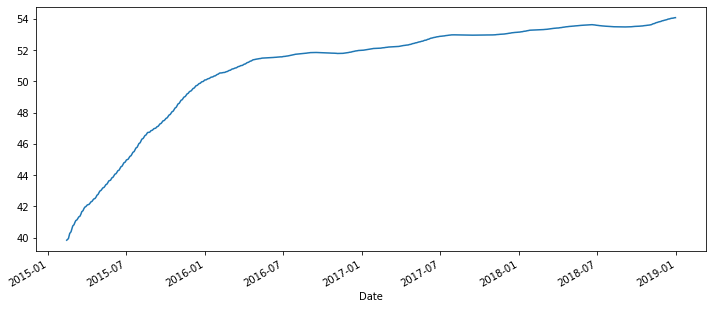

In [196]:
# df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

# Optional: specify a minimum number of periods to start from
df['Close'].expanding(min_periods=30).mean().plot(figsize=(12,5));

That's it! It doesn't help much to visualize an expanding operation against the daily data, since all it really gives us is a picture of the "stability" or "volatility" of a stock. However, if you do want to see it, simply uncomment the first plot line above and rerun the cell.

Next up, we'll take a deep dive into visualizing time series data!

# Visualizing Time Series Data

Let's go through a few key points of creating nice time series visualizations!

In [197]:
import pandas as pd
%matplotlib inline

In [200]:
# Load our dataset 

df = pd.read_csv('starbucks.csv',index_col='Date',parse_dates=True)

In [202]:
#Preiewing our head data 

df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [203]:
# To show that dates are already parsed
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

First we'll create a line plot that puts both <tt>'Close'</tt> and <tt>'Volume'</tt> on the same graph.<br>Remember that we can use <tt>df.plot()</tt> in place of <tt>df.plot.line()</tt>

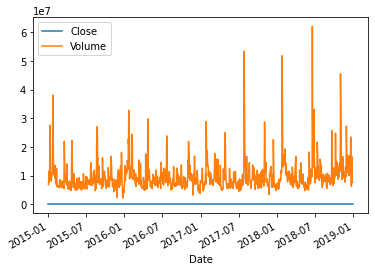

In [205]:
df.plot()

This isn't very helpful due to the difference in y-values, so we'll split them up.

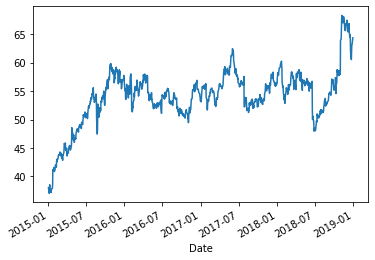

In [207]:
df['Close'].plot()

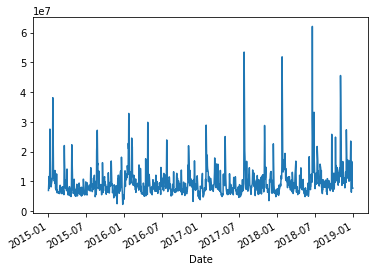

In [208]:
df['Volume'].plot()

# Plot Formatting

## Adding a title and axis labels

## X Limits

There are two ways we can set a specific span of time as an x-axis limit. We can plot a slice of the dataset, or we can pass x-limit values as an argument into <tt>df.plot()</tt>.

The advantage of using a slice is that pandas automatically adjusts the y-limits accordingly.

The advantage of passing in arguments is that pandas automatically tightens the x-axis. Plus, if we're also setting y-limits this can improve readability.

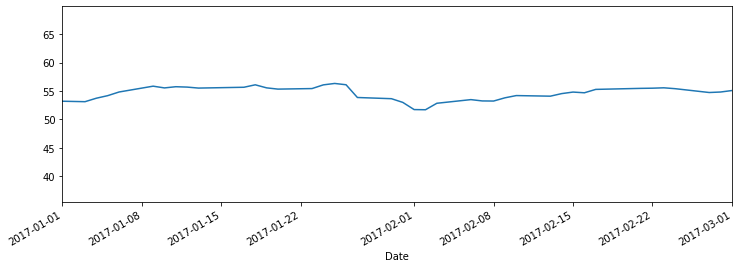

In [211]:
# Dates are separated by a colon:

df['Close'].plot(figsize=(12,4), xlim=['2017-01-01', '2017-03-01'])

# this is the same as 

# df['Close']['2017-01-01':'2017-03-01'].plot(figsize=(12,4)).autoscale(axis='x',tight=True);

<div class="alert alert-info"><strong>NOTE:</strong> It's worth noting that the limit values do <em>not</em> have to appear in the index. Pandas will plot the actual dates based on their location in time.<br><br>Also, another advantage of slicing over arguments is that it's easier to include the upper/lower bound as a limit.<br>That is, <tt><font color=black>df['column']['2017-01-01':].plot()</font></tt> is easier to type than <tt><font color=black>df['column'].plot(xlim=('2017-01-01',df.index.max()))</font></tt></div>

Now let's focus on the y-axis limits to get a better sense of the shape of the data.<br>First we'll find out what upper and lower limits to use.

In [212]:
# FIND THE MINIMUM VALUE IN THE RANGE:
df.loc['2017-01-01':'2017-03-01']['Close'].min()

51.6899

In [213]:
# FIND THE MAXIMUM VALUE IN THE RANGE:
df.loc['2017-01-01':'2017-03-01']['Close'].max()

56.3244

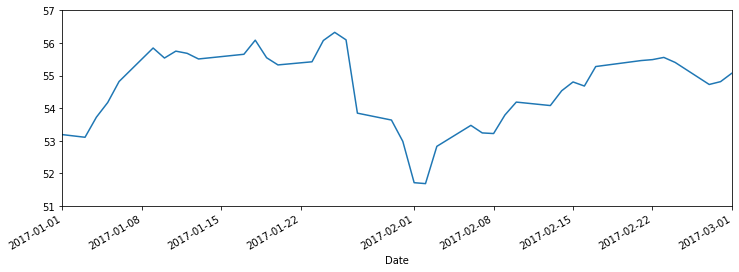

In [214]:
# PLUG THESE IN AS Y-LIMIT VALUES:
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01'],ylim=[51,57]);

<div class="alert alert-info"><strong>NOTE:</strong> Be careful when setting y-axis limits! Setting too narrow a slice can make graphs appear overly volatile. The above chart might lead you to believe that stocks were many times more valuable in January 2017 than in early February, but a look at them with the y-axis minimum set to zero tells a different story:</div>

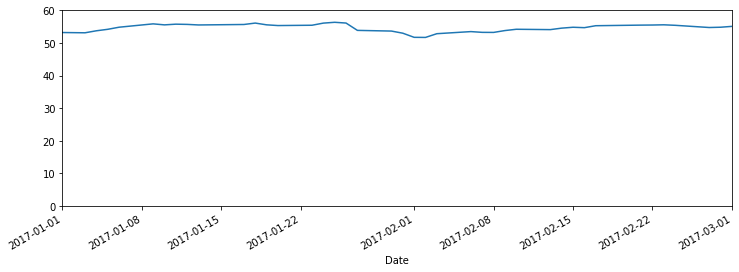

In [215]:
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01'],ylim=[0,60]);

## Title and axis labels

Let's add a title and axis labels to our subplot.
<div class="alert alert-info"><strong>REMEMBER:</strong> <tt><font color=black>ax.autoscale(axis='both',tight=True)</font></tt> is unnecessary if axis limits have been passed into <tt>.plot()</tt>.<br>
If we were to add it, autoscale would revert the axis limits to the full dataset.</div>

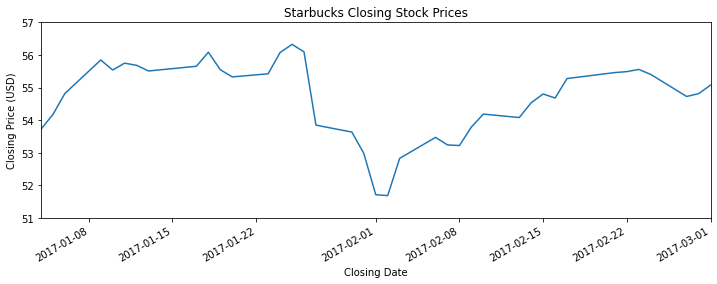

In [216]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(xlim=['2017-01-04','2017-03-01'],ylim=[51,57],figsize=(12,4),title=title)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Color and Style

We can pass arguments into <tt>.plot()</tt> to change the linestyle and color. Refer to the Customizing Plots lecture from the previous section for more options.

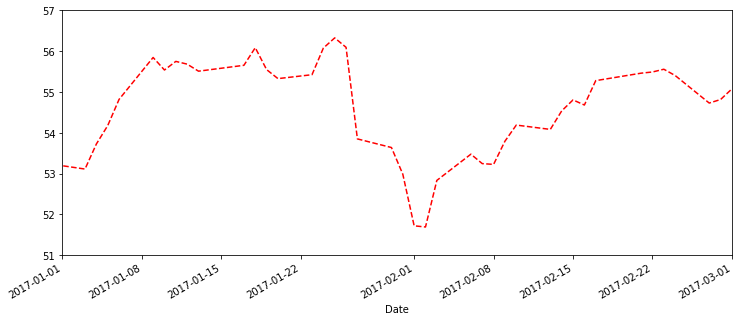

In [218]:
df['Close'].plot(xlim=['2017-01-01','2017-03-01'],figsize=(12,5),ylim=[51,57],ls='--',c='r');